# Import Libraries 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Additional Libraries 

In [61]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, cut_tree 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [84]:
def Bar(df,Column_name,bins):
  
  plt.figure(figsize=(18,7))
  freq, bins, p = plt.hist(df[Column_name], bins=bins,rwidth=0.9)

  # x coordinate for labels
  bin_centers = np.diff(bins)*0.5 + bins[:-1]

  n = 0
  for fr, x, patch in zip(freq, bin_centers,p):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0],2)),
                xy = (x, height),
                xytext = (0,0.2),
                textcoords = "offset points",
                ha = 'center', va = 'bottom'
                )
    n = n+1
  plt.grid()
  plt.xticks(bins)
  plt.title(Column_name)
  plt.show()

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [62]:
data_path = r'E:\ITI AI&ML\15.Machine Learning 2\CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [63]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
# Showing correlation between columns (PURCHASES, ONEOFF_PURCHASES)

correlation = df['PURCHASES'].corr(df['ONEOFF_PURCHASES'])

print(f"Correlation between 'PURCHASES' and 'ONEOFF_PURCHASES': {correlation}")

Correlation between 'PURCHASES' and 'ONEOFF_PURCHASES': 0.9168445587151447


In [9]:
# To see mu missing values 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [64]:
df_copy=df.copy()
df_copy.dropna(inplace=True)
df_copy.drop('CUST_ID', axis=1, inplace=True)

In [65]:
df_copy.shape

(8636, 17)

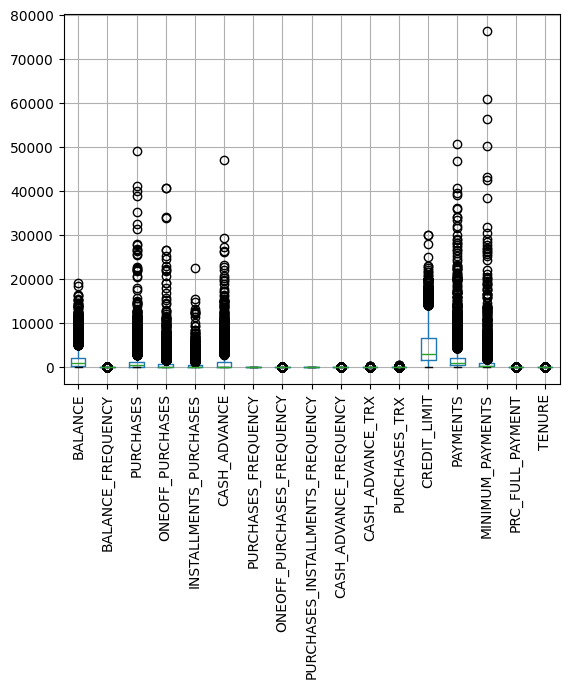

In [12]:
df_copy.boxplot()
plt.xticks(rotation=90)  
plt.show()

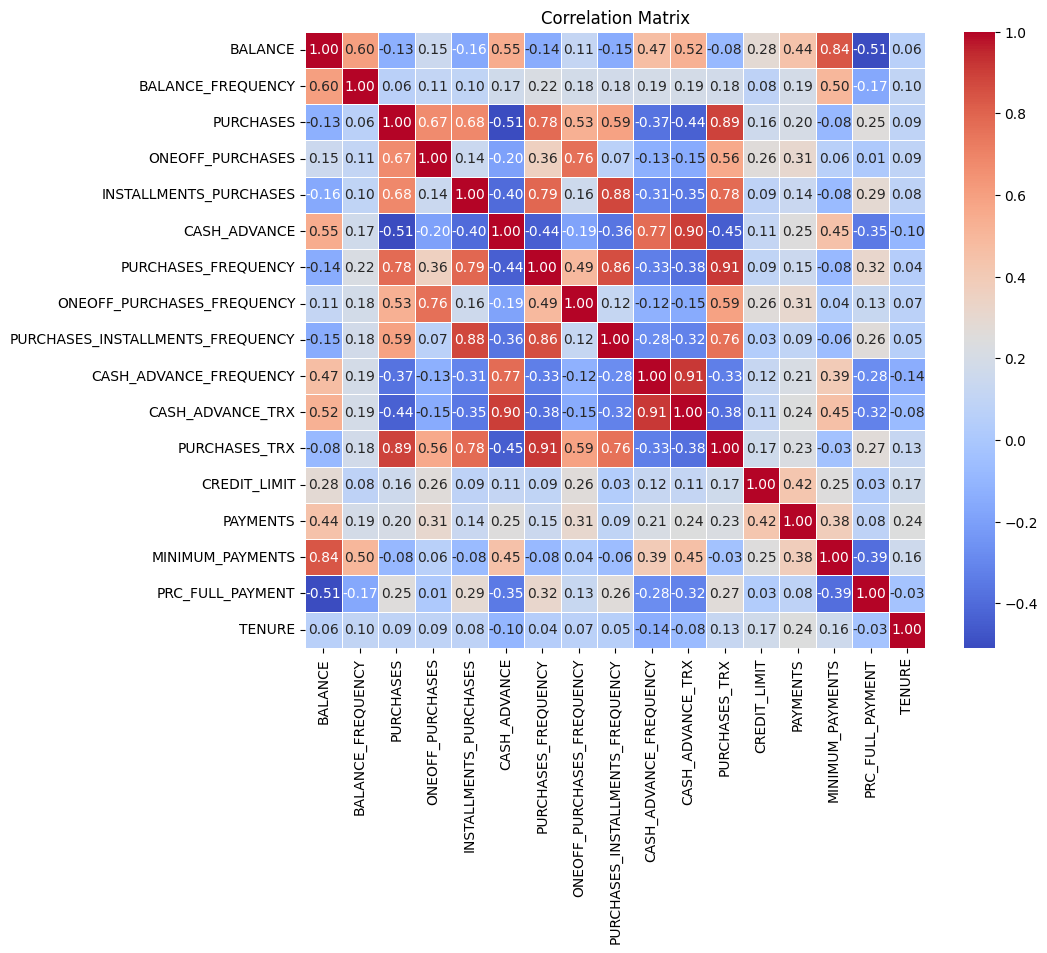

In [82]:
correlation_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

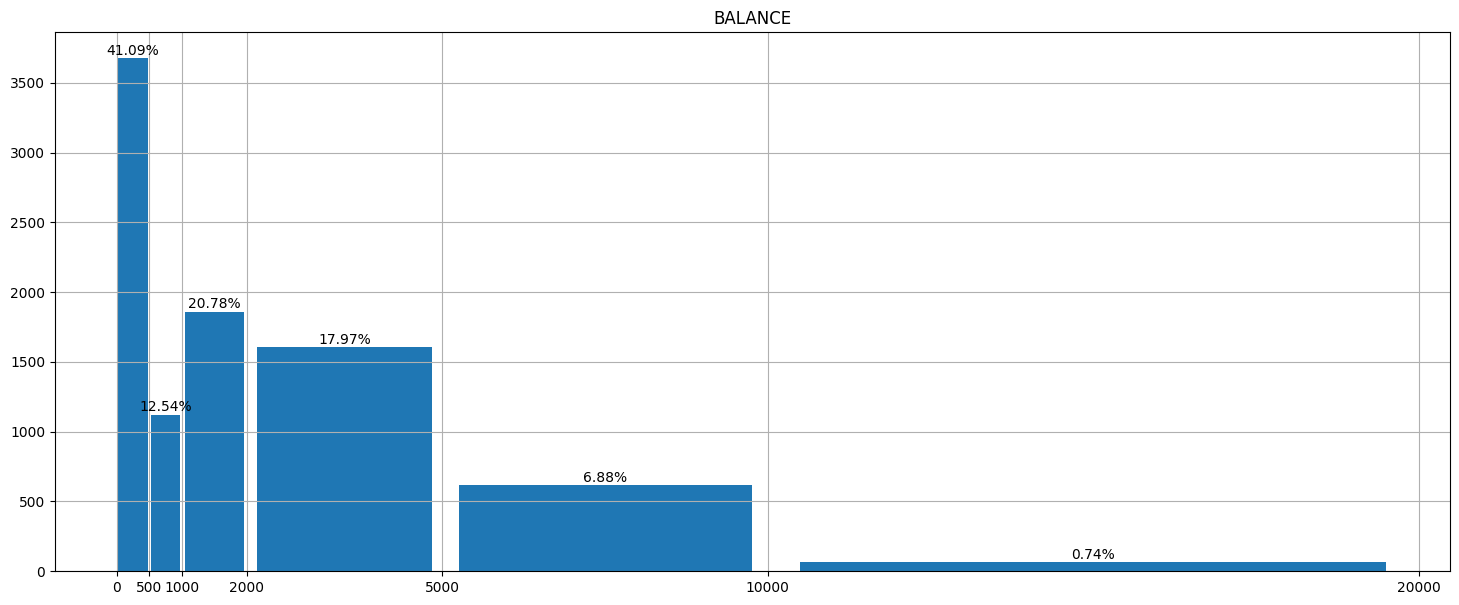

In [85]:
Bar(df,"BALANCE",[0,500,1000,2000,5000,10000,20000])

More than 90% have less than 5K in their credit card balance.

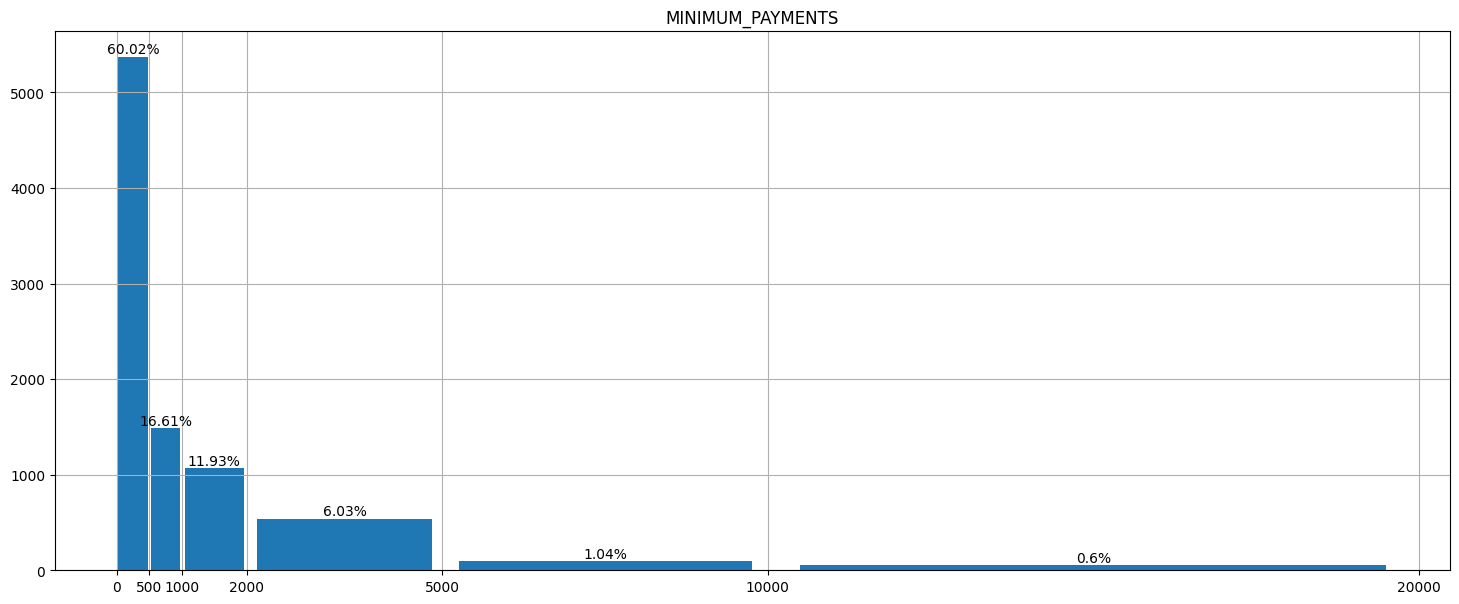

In [86]:
Bar(df,"MINIMUM_PAYMENTS",[0,500,1000,2000,5000,10000,20000])

MINIMUM_PAYMENTS ===> The minimum amount required to be paid each billing cycle to avoid late fees.
Also more than 90% have less than 5K in minimum payments.
This make sense because most data is left skewed.

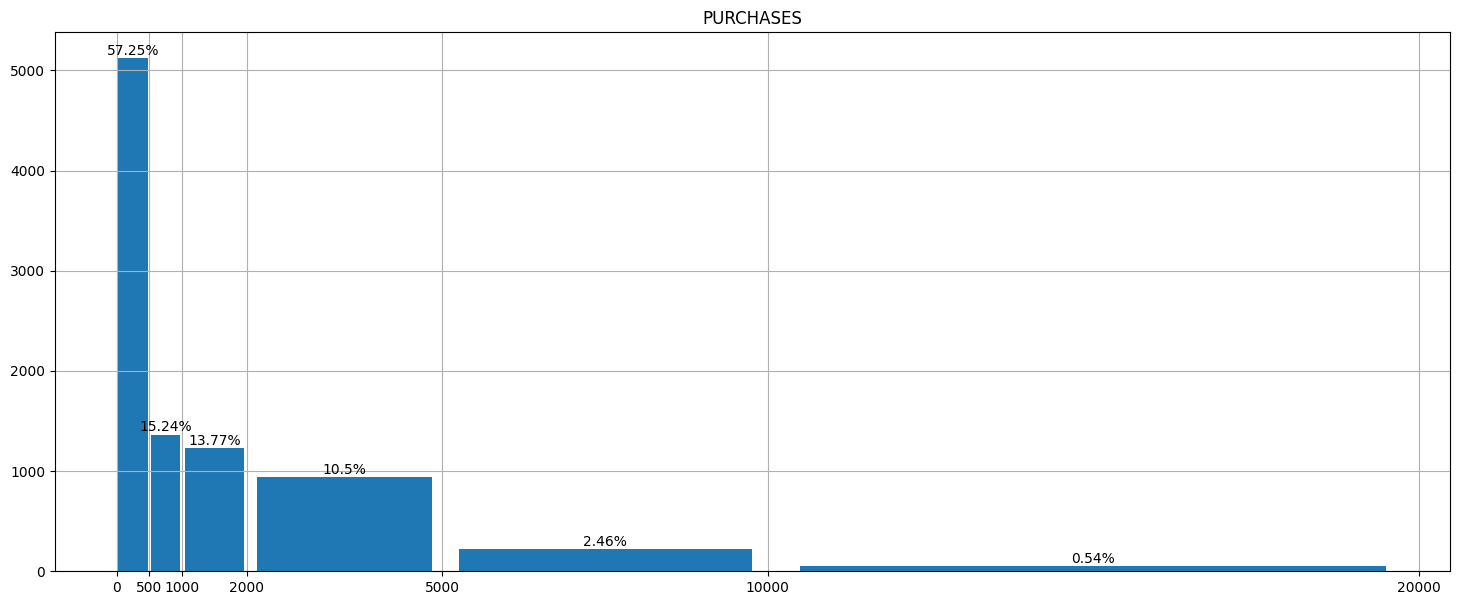

In [87]:
Bar(df,"PURCHASES",[0,500,1000,2000,5000,10000,20000])

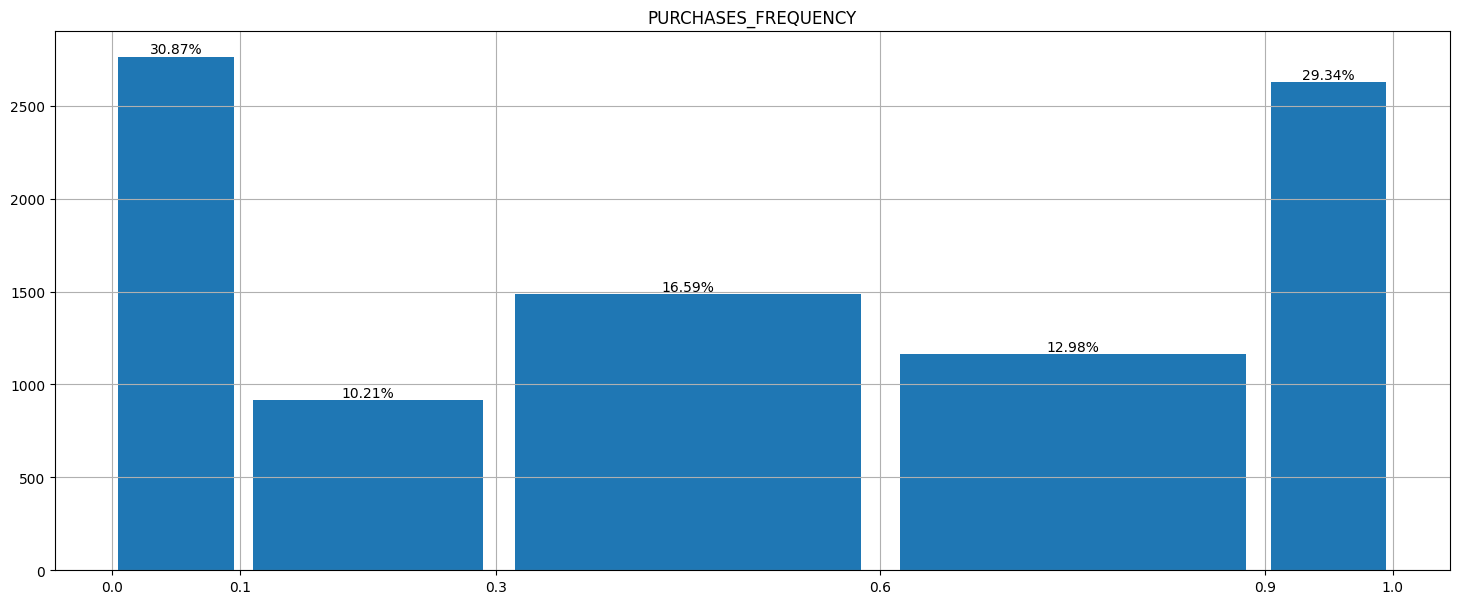

In [88]:
Bar(df,"PURCHASES_FREQUENCY",[0,0.1,0.3,0.6,0.9,1])

PURCHASES_FREQUENCY is a score indicating how frequently purchases are made using the card.
Looks like a 30% of the users are inactive (rarely using the card ).

## 3. <a name="3">Data preprocessing</a>



In [66]:
for col in df_copy.columns:
    q1 = df_copy[col].quantile(0.05)
    q3 = df_copy[col].quantile(0.95)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]

In [67]:
df_copy.shape

(8219, 17)

In [15]:
skewness_scores = df_copy.skew()
skewness_scores

BALANCE                             2.207374
BALANCE_FREQUENCY                  -2.034980
PURCHASES                           2.385497
ONEOFF_PURCHASES                    2.866361
INSTALLMENTS_PURCHASES              2.679585
CASH_ADVANCE                        2.768727
PURCHASES_FREQUENCY                 0.062899
ONEOFF_PURCHASES_FREQUENCY          1.577002
PURCHASES_INSTALLMENTS_FREQUENCY    0.517930
CASH_ADVANCE_FREQUENCY              1.742105
CASH_ADVANCE_TRX                    2.654893
PURCHASES_TRX                       2.516963
CREDIT_LIMIT                        1.438382
PAYMENTS                            2.565915
MINIMUM_PAYMENTS                    2.869902
PRC_FULL_PAYMENT                    1.905744
TENURE                             -2.962638
dtype: float64

Taking log to some columns

In [68]:
transformer = preprocessing.FunctionTransformer(np.log1p, validate=True)
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']
df_copy[cols] = transformer.transform(df_copy[cols])

## t-SNE

In [69]:
tsne = TSNE(n_components=2,perplexity=5.0 ,random_state=42)        
tsne_result = tsne.fit_transform(df_copy)

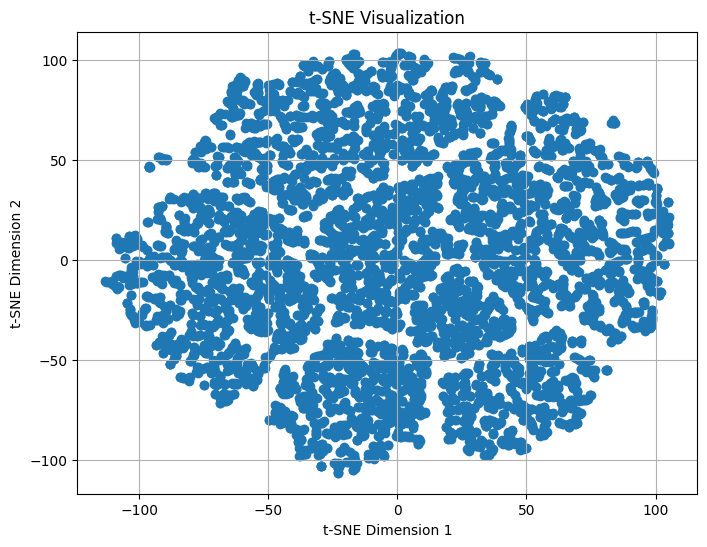

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

In [19]:
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)

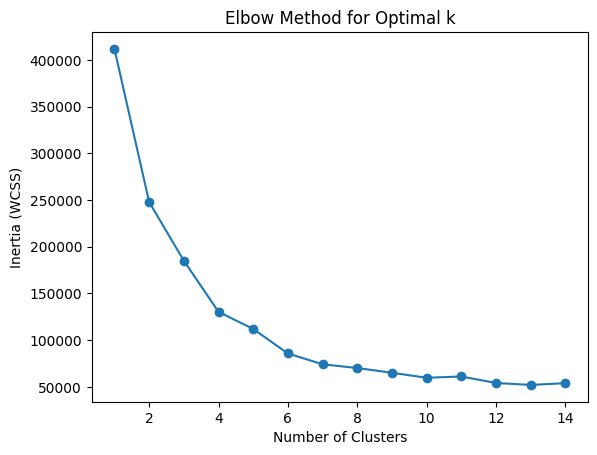

In [20]:
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=1, random_state=None)
kmeans.fit(df_copy)

KMeans(n_clusters=7, n_init=1)

In [71]:
kmeans_score = silhouette_score(df_copy, kmeans.fit_predict(df_copy))
kmeans_score

0.48000558816951505

In [39]:
cluster_labels = kmeans.labels_

In [24]:
plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster}')

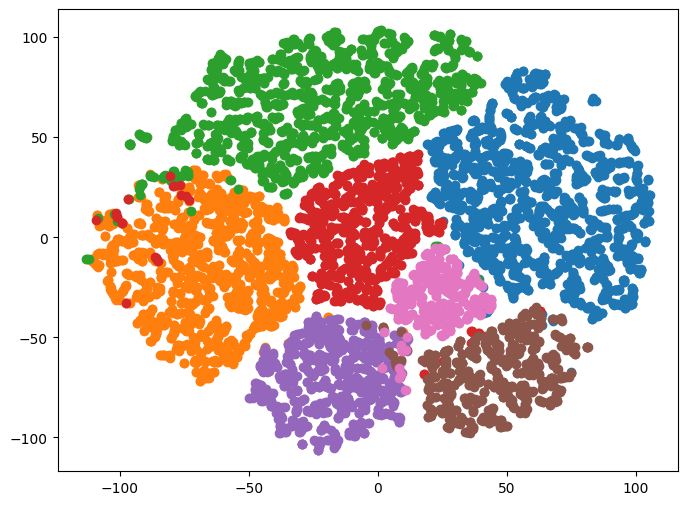

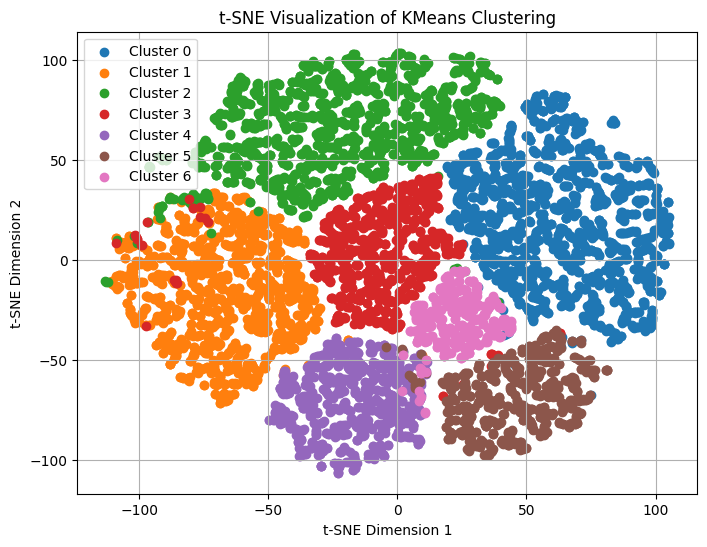

In [25]:
plt.legend()
plt.title('t-SNE Visualization of KMeans Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Hierarchial clustering

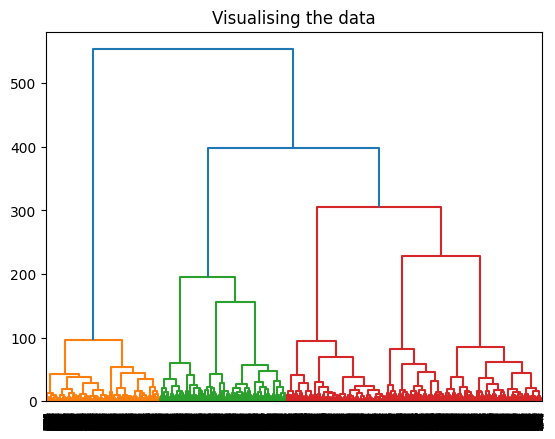

In [30]:
plt.title('Visualising the data')
link_mat = ward(df_copy)
dendrogram(link_mat)
plt.show()

In [72]:
hc = AgglomerativeClustering(n_clusters = 7,metric='euclidean', linkage ='ward')
hc.fit(df_copy)

AgglomerativeClustering(n_clusters=7)

In [73]:
hierarchical_score = silhouette_score(df_copy, hc.fit_predict(df_copy))
hierarchical_score

0.47623988050190325

In [35]:
cluster_labels = hc.labels_

In [36]:
for cluster in range(hc.n_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster}')

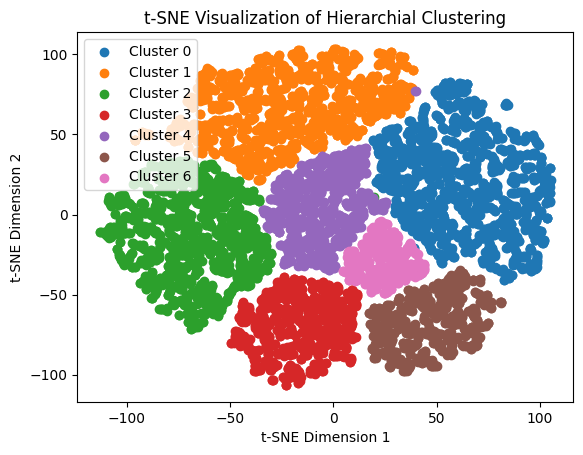

In [37]:
plt.legend()
plt.title('t-SNE Visualization of Hierarchial Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [21]:
# To estimate the epsilon for DBSCAN 
nbrs = NearestNeighbors(n_neighbors=6).fit(df_copy)
distances, _ = nbrs.kneighbors(df_copy)
distances = np.sort(distances[:, -1])

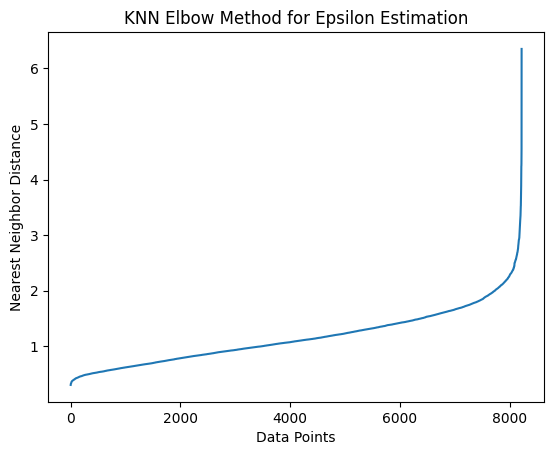

In [22]:
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'Nearest Neighbor Distance')
plt.title(f'KNN Elbow Method for Epsilon Estimation')
plt.show()

## DBSCAN

In [74]:
# 2.1 from last plot
db = DBSCAN(eps=2.1, min_samples=5).fit(df_copy)

In [75]:
cluster_labels = db.labels_

In [76]:
cluster_labels

array([0, 1, 2, ..., 0, 1, 6], dtype=int64)

In [77]:
dbscan_score = silhouette_score(df_copy, db.fit_predict(df_copy))
dbscan_score

0.47228837430718346

In [45]:
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
num_outliers = list(cluster_labels).count(-1)

print("Number of clusters:", num_clusters)
print("Number of outliers:", num_outliers)

Number of clusters: 7
Number of outliers: 111


In [46]:
for cluster in range(num_clusters):
    plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster}')

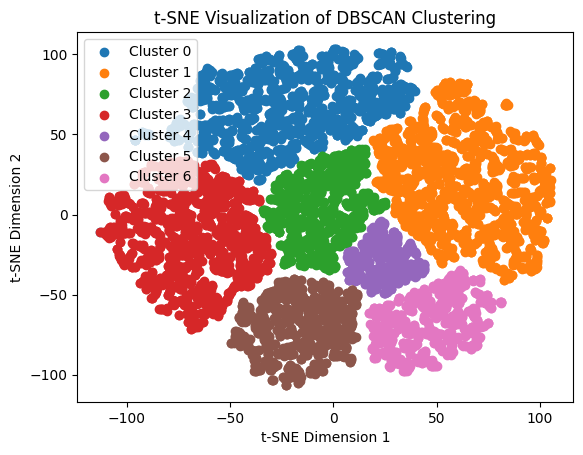

In [47]:
plt.legend()
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [48]:
plt.figure(figsize=(8, 6))
for cluster in set(cluster_labels):
    if cluster == -1:  
        plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1],
                     c='black', label='Outliers')
    else:  
        plt.scatter(tsne_result[cluster_labels == cluster, 0], tsne_result[cluster_labels == cluster, 1], 
                    label=f'Cluster {cluster}')

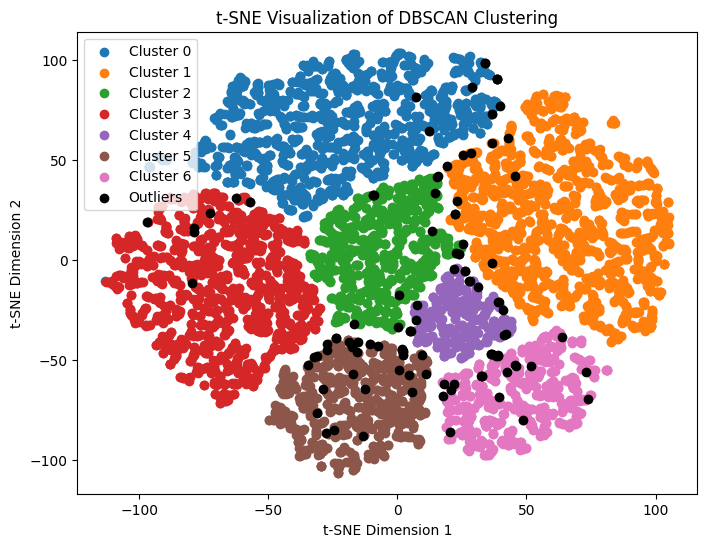

In [49]:
plt.legend()
plt.title('t-SNE Visualization of DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

## Gaussian Mixture

In [78]:
gm = GaussianMixture(n_components=7, random_state=0).fit(df_copy)

In [79]:
gmm_score = silhouette_score(df_copy, gm.fit_predict(df_copy))
gmm_score

0.4700166255051416

In [52]:
cluster_assignments = gm.predict(df_copy)

In [53]:
plt.figure(figsize=(8, 6))
for cluster in range(gm.n_components):
    plt.scatter(tsne_result[cluster_assignments == cluster, 0], tsne_result[cluster_assignments == cluster, 1],
                 label=f'Cluster {cluster}')

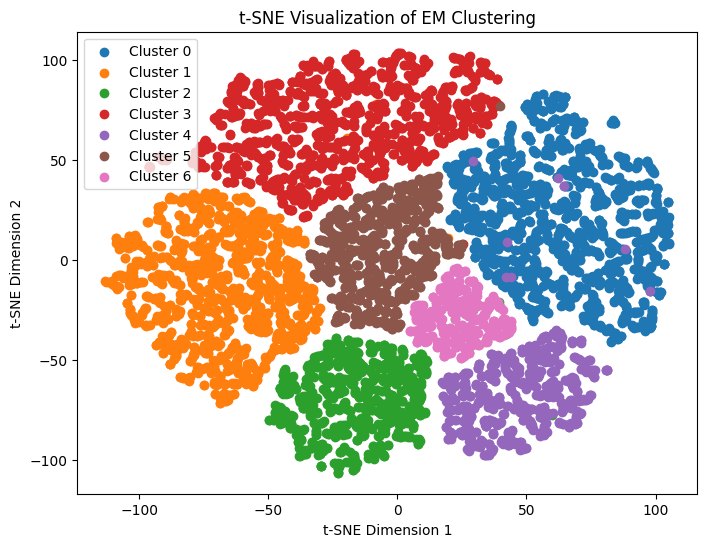

In [54]:
plt.legend()
plt.title('t-SNE Visualization of EM Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# PCA 

In [36]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy)

In [37]:
pca_result.shape

(8219, 2)

In [40]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

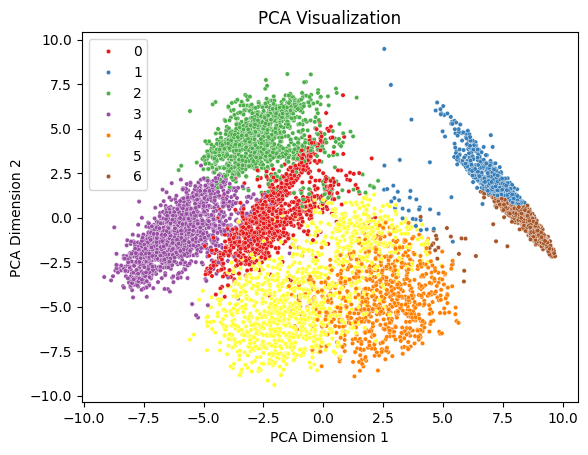

In [43]:
sns.scatterplot(x= pca_result[:, 0], y=pca_result[:, 1],hue=kmeans.labels_, palette='Set1', s=10)
plt.title('PCA Visualization')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

# Let's use PCA followed by t-SNE 

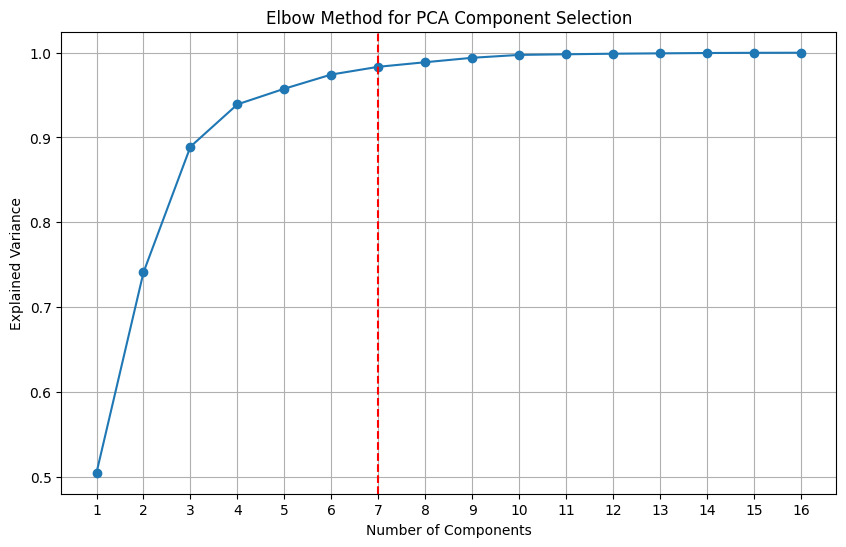

In [46]:
explained_variance = []
components_range = range(1, min(df_copy.shape[1], 30))  # Adjust the upper limit as needed

for n_components in components_range:
    pca = PCA(n_components=n_components)
    pca.fit(df_copy)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Step 3: Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance, marker='o')
plt.title('Elbow Method for PCA Component Selection')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(components_range)  
plt.grid()
# Line for chosen number
plt.axvline(x=7, color='r', linestyle='--')  
plt.show()

In [56]:
pca = PCA(n_components=7)
pca_result = pca.fit_transform(df_copy)

In [57]:
tsne = TSNE(n_components=2, random_state=42, learning_rate=20 , perplexity=42)
X_tsne = tsne.fit_transform(pca_result)

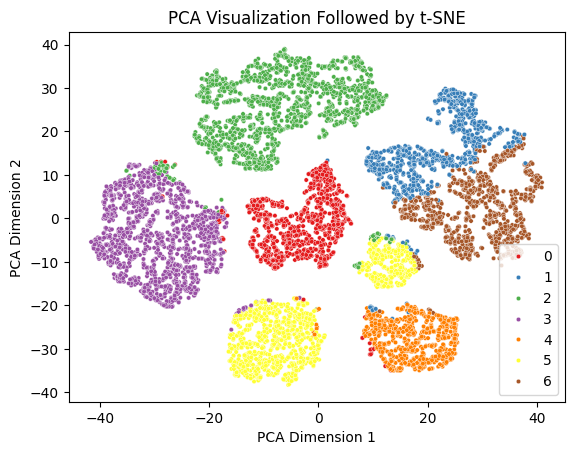

In [59]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue=cluster_labels, palette='Set1', s=10)
plt.title('PCA Visualization Followed by t-SNE')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

In [80]:
# Compare silhouette scores
scores = {
    'K-Means': kmeans_score,
    'DBSCAN': dbscan_score,
    'GMM (EM)': gmm_score,
    'Hierarchical': hierarchical_score
}

best_algorithm = max(scores, key=scores.get)
print(f"Best Clustering Algorithm: {best_algorithm}")
print("Silhouette Scores:")
for algorithm, score in scores.items():
    print(f"{algorithm}: {score}")

Best Clustering Algorithm: K-Means
Silhouette Scores:
K-Means: 0.48000558816951505
DBSCAN: 0.47228837430718346
GMM (EM): 0.4700166255051416
Hierarchical: 0.47623988050190325
